**TP n°3** :  Deep Learning pour caractériser des lois de probabilité sur un espace d'images.

#Plan

##Partie I:

Régression quantile.
* Fonction de coût adaptée
* Régression quantile: un premier exemple
* Régression quantile simultanée


##Partie II:

Echantillonnage par une méthode générative: l'exemple des GAN.
* Principe de base et premier entraînement 
* Limites
* Quelques solutions
* Un GAN conditionnel


Durée : 3 h

### Introduction à la partie II:

A travers les exercices qui suivent, on présente deux outils qui permettent de mesurer l'écart entre deux lois de probabilités: la divergence de Kullback-Leibler et la distance de Wasserstein.

**Exercice 1** : la divergence de Kullback-Leibler

Soient deux lois de probabilités $\mathcal{P}$ et $\mathcal{Q}$ admettant comme densités $p$ et $q$, **strictement positives** sur $\mathbb{R}^d$. La divergence de Kullback-Leibler est donnée par : 
$$ D_{KL} ( \mathcal{P} || \mathcal{Q})=  \int_{\mathbb{R^d}} p(x) . ln{\bigg (}\dfrac{p(x)}{q(x)} {\bigg)} dx $$

**a.** Pourquoi cette quantité est-elle positive? Quand est-elle nulle ?

**b.** Calculer cette quantité pour deux lois normales de mêmes variance et d'espérances $\mu_1$ et $\mu_2$.

**c.** Cette quantité définit-elle une distance ?

**Remarque** : dans la suite nous utiliserons une version symétrisée de $D_{KL}$. Il s'agit de la divergence de Jensen-shannon :

$$D_{JS} ( \mathcal{P} || \mathcal{Q} )  = \dfrac{1}{2} D_{KL}(\mathcal{P}||\mathcal{M}) +  \dfrac{1}{2} D_{KL}(\mathcal{Q}||\mathcal{M})$$ où $\mathcal{M} = \dfrac{1}{2} (\mathcal{Q} + \mathcal{P})$


**Exercice 2** La distance de Wasserstein

Pour définir la version la plus simple de la distance de Wasserstein entre deux distributions $\mathcal{P}$ et $\mathcal{Q}$ on suppose seulement qu'elles admettent un moment d'ordre 1. Elle est alors définie par : 

$$ W(\mathcal{P},\mathcal{Q}) = \underset{\{\gamma \in \Pi(\mathcal{P},\mathcal{Q})\}}{inf} \mathbb{E}_{(X,Y) \sim \gamma} || X - Y || $$

Où $\Pi(\mathcal{P},\mathcal{Q})$ désigne l'ensemble de toutes les lois jointes de marginales $\mathcal{P}$ et $\mathcal{Q}$ et $||.||$ désigne la norme usuelle de $\mathbb{R}^d$.

**a.** Reprenons la variable $X$ vue à l'exercice 1. 
Comment calcule-t-on $\mathbb{E}_{(X_1,X_2)} | X_2 - X_1 |$ ? 

**b.** La loi de $X$ représente l'une des lois jointes de  $\Pi(\mathcal{N}(0,1),\mathcal{N}(0,1))$. Mais que vaut $W(\mathcal{N}(0,1),\mathcal{N}(0,1))$ ?

**c.** Quelles sont deux propriétés évidentes de $W$ ?

La distance de Wasserstein a une interprétation physique bien connue : c'est le travail minimum à fournir pour déplacer une distribution de masses vers une autre distribution de masses. En effet, on peut voir une loi jointe comme une façon de ventiler chaque élément de masse $p(x)dx$ vers l'ensemble des éléments $q(y)dy$ tout en conservant la masse totale.

**d.** Intuitivement, pour quelle raison la distance de Wasserstein satisfait-elle l'inégalité triangulaire ? 

**Remarque**: De façon générale, la distance de Wasserstein peut difficilement être calculée directement. Pour l'évaluer, on peut se ramener à un problème d'optimisation grâce à la [dualité de Kantorovitch-Rubinstein](https://https://colab.research.google.com/drive/1uuAC25WpowNFFlmwcwb-w6pXdPirvtKo#scrollTo=x-oAn-4nWJUK&line=19&uniqifier=1), qui établit un lien avec les fonctions lipschitziennes: 

$$ W(\mathcal{P},\mathcal{Q}) = \underset{\ f \in \mathcal{F}_{1}}{sup} {\bigg [} \mathbb{E}_{X \sim \mathcal{P}} [ f(X) ] -  \mathbb{E}_{ X \sim \mathcal{Q}} [ f(X) ]  {\bigg ]} $$


où $\mathcal{F}_{1}$ représente l'ensemble des fonctions 1-lipschitziennes sur $\mathbb{R}^d$. 




### Echantillonnage par une méthode générative: l'exemple des GAN.  

Dans cette partie, nous allons chercher à caractériser une distribution dans un domaine d'images, et non plus à l'échelle du pixel. 
En grande dimension, et en particulier sur des images réelles, la loi jointe n'est pas modélisable. Il n'est pas question d'en chercher la densité. Par contre, on peut chercher à échantilloner cette loi en s'appuyant sur un jeu d'images existant. \\
Nous commencerons par le faire sans nous préoccuper de l'aspect conditionnel: 
dans l'**exercice 3** il s'agit de construire un **modèle génératif** qui échantillonne un domaine d'images de synthèse. \\
Les modèles génératifs récents sont en très grande majorité construits à partir de réseaux de neurones profonds. Dans le domaine de la génération d'images, l'une des princpales approches est fondée sur les **GANs** (pour Generative Adversarial Networks). L'**exercice 3** illustre cette approche dans sa version la plus simple, tandis que l'**exercice 4** en présente quelques variantes. \\
Enfin, l'**exercice 5** nous donne l'occasion de revenir sur l'aspect conditionnel. L'approche par GAN y est modifiée de façon à échantilloner une loi conditionnelle implicite.

**Exercice 3** Un premier GAN.



Le principe du GAN est simple. On se donne:
- un vecteur aléatoire $Z$, qu'on échantillonne
  suivant une loi simple, typiquement un bruit blanc gaussien
- un réseau génératif $G_\theta$ ($\theta$ représente les poids du réseau) qui va proposer une image $G_\theta(Z)$
- un réseau discriminateur $D_\rho$ (même remarque que tout à l'heure) terminé par une fonction sigmoïde qui va classer une image $x$ comme étant "réelle" ($D(x) > 0.5$) ou "fausse" ($D(x) < 0.5$).

Dans la suite, on omet les notations $\rho$ et $\theta$.


L'algorithme consiste à entraîner $G_\theta$ et $D_\rho$ sur des tâches
contradictoires: 
- $D_\rho$ est entrainé à distinguer les images du jeu de données ($x^{(i)}$) des images générées par $G_\theta$ (notées $G(z^{(i)})$). 
Dans la version initiale, on utilise l'entropie croisée comme fonction de coût. Sur une paire de deux images, l'une fausse, l'autre vraie, le coût s'écrit ainsi:
  $$  - {\bigg [} ln(D(x^{(i)})) + ln(1 - D(G(z^{(i)})) {\bigg ]}$$
  

- $G_\theta$ est entrainé à "tromper" le discriminateur avec la fonction de coût antagoniste: 
  $$  ln(1 - D(G(z^{(i)}))) $$


Intuitivement, l'ensemble doit converger vers la solution au problème:

$$ \underset{G}{min} \, \underset{D}{max} {\bigg [} \mathbb{E}_X [ln D(X)] + \mathbb{E}_Z [ln(1 - D(G(Z)))] {\bigg ]} $$

Avant de voir si une solution existe, établissons, mettons l'algorithme en oeuvre sur un problème simple.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import time

import torch
import torchvision
import torch.nn as nn   
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
os.chdir('drive/MyDrive/TP_ENM_2223/TP_2223_corr_P')

In [ ]:
from utile_GANs import *

In [ ]:
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

Donnons-nous d'abord un problème de génération d'images. La fonction suivante permet d'échantillonner les images $X$ et le vacteur aléatoire $Z$:

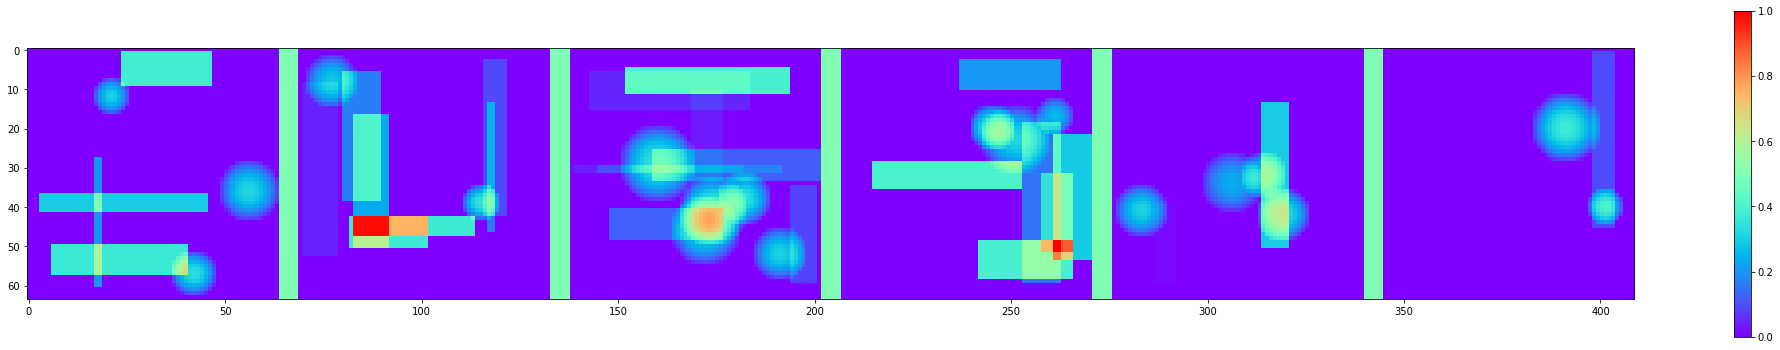

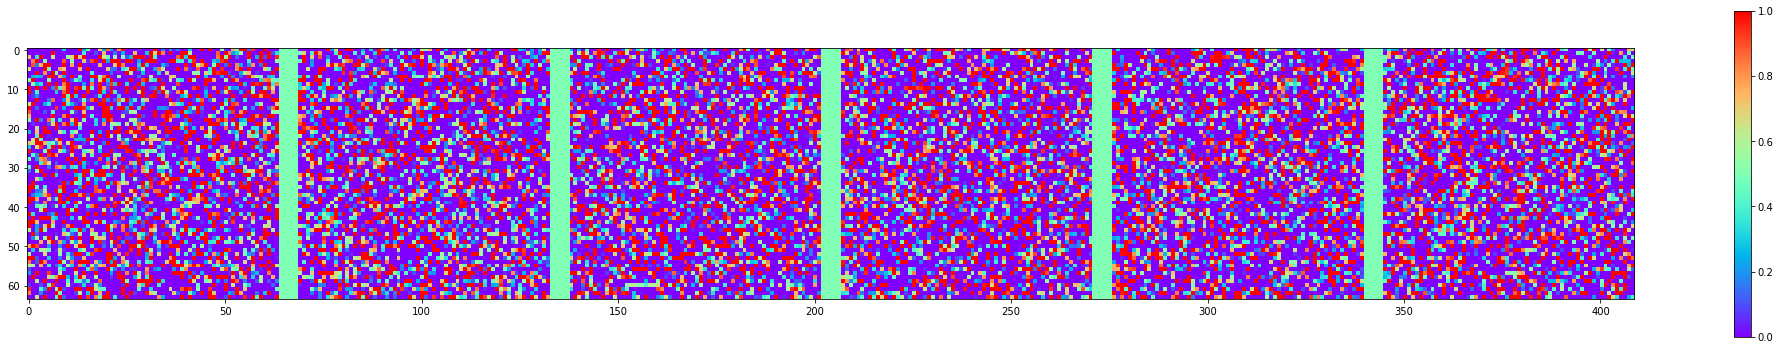

In [ ]:
#Proportion de rectangle dans l'image : 
lambda_rec = 0.001


x , z = gen_DCGAN(6,lambda_rec = lambda_rec)

#versions propres (cellules seules)
fig1 = plt.figure(1, figsize=(36, 6))
voir_batch2D(x, 6, fig1, k=0, min_scale=0,max_scale=1)


fig3 = plt.figure(3, figsize=(36, 6))
voir_batch2D(z, 6, fig3, k=0, min_scale=0,max_scale=1)

**Q1** Le vecteur $Z$ est une image. Quel type de réseau sera adapté pour $G$ ? L'instancier. 

**Q2** sur un tel problème, le réseau D peut être défini assez librement. En définir un qui ait au moins deux couches cachées.

Précisons maintenant certains paramètres de l'apprentissage (les derniers sont standards pour les GANs) 

In [ ]:
#Fixation de la graine (pour pouvoir reproduire les résultats)
manualSeed = 1
random.seed(manualSeed)
torch.manual_seed(manualSeed)

# Nb de processus en parallèle:
workers = 2

# Taille de l'image
image_size = 64

# Nb de canaux
nc = 1

# Taille du batch:
batch_size = 64

# Nb batches/ d'époques
num_batches = 200
num_epochs = 10

# Taux d'appr.
lr = 0.0002 

# Beta1 hyperparam pour Adam
beta1 = 0.5  #Parfois simplement 0.

# Nombre de GPUs
ngpu = 1

# Initialize BCELoss function
criterion = nn.BCELoss()

#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1).cuda()

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))


# scheduler (pas utile pour l'instant)
step_size = 15 # ( > Nb époques)

#gamma scheduler
gamma = 0.2

schedulerD = torch.optim.lr_scheduler.StepLR(optimizerD, step_size = step_size, gamma = gamma)
schedulerG = torch.optim.lr_scheduler.StepLR(optimizerG, step_size = step_size, gamma = gamma)

In [ ]:
# Pour voir comment évolue G(z), z fixé le long de l'apprentisssage :
_ ,  fixed_z = gen_DCGAN(batch_size, lambda_rec = lambda_rec)

**Q3** Commenter le code ci-dessous après l'avoir lancé:

In [ ]:
# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i in range(num_batches):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        
        x , z = gen_DCGAN(batch_size, lambda_rec = lambda_rec)
        
        netD.zero_grad()
        real_cpu = x.cuda()
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float).cuda()
        output = netD(real_cpu).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()
        fake = netG(z.cuda())
        label.fill_(fake_label)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()
        netG.zero_grad()
        label.fill_(real_label) 
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, num_batches,
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        G_losses.append(errG.item())
        D_losses.append(errD.item())

        if (iters % 100 == 0) or ((epoch == num_epochs-1) and (i == num_batches-1)):
            with torch.no_grad():
                fake = netG(fixed_z.cuda()).detach().cpu()
            img_list.append(fake)
        iters += 1

#    schedulerD.step()
#    schedulerG.step()


**Q4** Représenter l'évolution des fonctions de coût pour le générateur et le discriminateur. Visualiser les images successives.

**Q5** Relancer un apprentissage avec de srectangles en plus sur l'image. Visualiser et commenter.

**Q6** D'après [cet article](https://arxiv.org/pdf/1406.2661.pdf), quelle est la nature de la solution au problème de minmax vu au dessus ?
Quel outil principal utilise-t-on pour en faire la preuve ? 

**Exercice n°4** Wasserstein-GANs

Un des obstacles les plus courants, lorsque l'on entraîne des GANs, ce sont les "mode collapse": le générateur produit toujours le ou les mêmes motifs. Les [Wasserstein-GANs](https://https://arxiv.org/pdf/1701.07875.pdf) offrent une parade intéressante, et la [pénalisation de gradients](https://arxiv.org/pdf/1704.00028.pdf) permet d'en améliorer encore les performances.
Le code suivant est une implémentation. Commenter et tester.

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
        )

    def forward(self, input):
        return self.main(input)



n_channels, n_classes,size = 1, 1 , 16
netG = UNet(n_channels, n_classes, size).cuda()#Generator(ngpu).cuda()

netD = Discriminator().cuda()
netD.apply(weights_init)


print(netD)

real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
# optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
# optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

optimizerD = optim.RMSprop(netD.parameters(), lr=lr)
optimizerG = optim.RMSprop(netG.parameters(), lr=lr)
# schedulerD = torch.optim.lr_scheduler.StepLR(optimizerD, step_size = step_size, gamma = gamma)
# schedulerG = torch.optim.lr_scheduler.StepLR(optimizerG, step_size = step_size, gamma = gamma)

add_gp = True

def calculate_gradient_penalty(model, real_images, fake_images):
    """Calculates the gradient penalty loss for WGAN GP"""
    alpha = torch.randn((real_images.size(0), 1, 1, 1)).cuda()
    interpolates = (alpha * real_images + ((1 - alpha) * fake_images)).requires_grad_(True)

    model_interpolates = model(interpolates)
    grad_outputs = torch.ones(model_interpolates.size(), requires_grad=False).cuda()

    # Get gradient w.r.t. interpolates
    gradients = torch.autograd.grad(
        outputs=model_interpolates,
        inputs=interpolates,
        grad_outputs=grad_outputs,
        create_graph=True,
        retain_graph=True,
        only_inputs=True,
    )[0]
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = torch.mean((gradients.norm(2, dim=1) - 1) ** 2)
    return gradient_penalty


In [ ]:
_ ,  fixed_z = gen_DCGAN(batch_size, lambda_rec = lambda_rec)
fixed_z = fixed_z.cuda()

In [ ]:
img_list = []
G_losses = []
D_losses = []


n_critic = 5
clip = 0.01

for epoch in range(num_epochs):

    for i in range(num_batches_generator):


        netG.train()
        for j in range(n_critic):
            x , z = gen_DCGAN(batch_size, lambda_rec = lambda_rec)
            

            netD.zero_grad()

            real = x.cuda()

            output_real = netD(real)

            

            fake = netG(z.cuda())

            output_fake = netD(fake.detach())
            if add_gp:
                gradient_penalty = calculate_gradient_penalty(netD,
                                                   real.data, fake.data)
                
                errD = output_fake.mean() - output_real.mean() + 10 * gradient_penalty
            
            else : 
                errD = output_fake.mean() - output_real.mean() 
                
            errD.backward()
            

            optimizerD.step()
            
            if not add_gp:        
                for p in netD.parameters():
                    p.data.clamp_(-clip, clip)

        netG.zero_grad()
        fake = netG(z.cuda())
        output_fake = netD(fake).view(-1)
        errG = - output_fake.mean()
        errG.backward()
        optimizerG.step()
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f'
                  % (epoch+1, num_epochs, i, num_batches_generator,
                     errD.item()))
        G_losses.append(errG.item())
        D_losses.append(errD.item())

    with torch.no_grad():
        netG.eval()
        fake = netG(fixed_z.cuda()).detach().cpu()
    img_list.append(fake)

        
    schedulerD.step()
    schedulerG.step()

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")

plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:

print(len(img_list))
voir_batch2D(img_list[-2], 8, fig1, k=0, min_scale=0,max_scale=1)